In [2]:
#from IPython.display import *
#import ipywidgets as widgets
#from ipywidgets import *

from torch_geometric.datasets import TUDataset
import networkx as nx
from networkx import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import cairocffi

In [4]:
# load six datasets used in the paper
dataset_Enzymes = TUDataset(root='data', name='ENZYMES')
dataset_Proteins = TUDataset(root='data', name='PROTEINS')
dataset_DD = TUDataset(root='data', name='DD') # note to check whether it equals to D&D in paper
dataset_NCI1 = TUDataset(root='data', name='NCI1')
dataset_NCI109 = TUDataset(root='data', name='NCI109')
dataset_Mutagenicity = TUDataset(root='data', name='Mutagenicity')

SELECT WHICH OF THE ABOVE DATASETS YOU WANT TO LOOK AT

In [3]:
dataset = dataset_Enzymes

In [5]:
def info_dataset(dataset):
  num_graphs = len(dataset)
  num_classes = dataset.num_classes
  num_node_features = dataset.num_node_features
  print()
  print("Number of graphs: ", num_graphs)
  print("Number of classes: ", num_classes)
  print("Number of node features: ", num_node_features)

In [6]:
def info_degree(g):
  degree_total = np.sum(g.degree())
  
  print("Average degree:", round((degree_total/g.vcount()),2))
  print("Maximum degree:", max(g.degree))

In [166]:
np_enzymes = []
np_proteins = []
np_dd = []
np_nci1 = []
np_nci109 = []
np_muta = []

In [167]:
def get_infos(graph):
    edges = number_of_edges(graph)
    nodes = number_of_nodes(graph)
    average_degree = np.mean(list(dict(graph.degree()).values()))
    average_neighbor_degree = np.mean(list(nx.average_neighbor_degree(graph).values()))
    correlation = nx.degree_pearson_correlation_coefficient(graph)

    return [edges, nodes, average_neighbor_degree, average_neighbor_degree, correlation]

In [168]:

for dataset, array in zip([dataset_Enzymes, dataset_Proteins, dataset_DD, dataset_NCI1, dataset_NCI109, dataset_Mutagenicity], [np_enzymes, np_proteins, np_dd, np_nci1, np_nci109, np_muta]):
  # get average degree and maximum degree of each dataset
    
    for i in range(len(dataset)):

        graph = nx.from_edgelist(dataset[i].edge_index.numpy().T)
        array.append(get_infos(graph))
        
        
    

/home/bjoern/miniconda3/envs/HGL/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [169]:
np_enzymes = np.array(np_enzymes)
np_proteins = np.array(np_proteins)
np_dd = np.array(np_dd)
np_nci1 = np.array(np_nci1)
np_nci109 = np.array(np_nci109)
np_muta = np.array(np_muta)

In [170]:
np.nanmean(np_enzymes, axis=0)
np.nanstd(np_enzymes, axis=0)

np.nanmean(np_proteins, axis=0)
np.nanstd(np_proteins, axis=0)

np.nanmean(np_dd, axis=0)
np.nanstd(np_dd, axis=0)

np.nanmean(np_nci1, axis=0)
np.nanstd(np_nci1, axis=0)

np.nanmean(np_nci109, axis=0)
np.nanstd(np_nci109, axis=0)

np.nanmean(np_muta, axis=0)
np.nanstd(np_muta, axis=0)

array([16.82005721, 15.88641155,  0.24927632,  0.24927632,  0.16115823])

In [171]:
mean_edges = [np.nanmean(np_enzymes, axis=0)[0], np.nanmean(np_proteins, axis=0)[0], np.nanmean(np_dd, axis=0)[0], np.nanmean(np_nci1, axis=0)[0], np.nanmean(np_nci109, axis=0)[0], np.nanmean(np_muta, axis=0)[0]]
mean_nodes = [np.nanmean(np_enzymes, axis=0)[1], np.nanmean(np_proteins, axis=0)[1], np.nanmean(np_dd, axis=0)[1], np.nanmean(np_nci1, axis=0)[1], np.nanmean(np_nci109, axis=0)[1], np.nanmean(np_muta, axis=0)[1]]
mean_degree = [np.nanmean(np_enzymes, axis=0)[2], np.nanmean(np_proteins, axis=0)[2], np.nanmean(np_dd, axis=0)[2], np.nanmean(np_nci1, axis=0)[2], np.nanmean(np_nci109, axis=0)[2], np.nanmean(np_muta, axis=0)[2]]
mean_neighbor_degree = [np.nanmean(np_enzymes, axis=0)[3], np.nanmean(np_proteins, axis=0)[3], np.nanmean(np_dd, axis=0)[3], np.nanmean(np_nci1, axis=0)[3], np.nanmean(np_nci109, axis=0)[3], np.nanmean(np_muta, axis=0)[3]]
mean_correlation = [np.nanmean(np_enzymes, axis=0)[4], np.nanmean(np_proteins, axis=0)[4], np.nanmean(np_dd, axis=0)[4], np.nanmean(np_nci1, axis=0)[4], np.nanmean(np_nci109, axis=0)[4], np.nanmean(np_muta, axis=0)[4]]

In [172]:
std_edges = [np.nanstd(np_enzymes, axis=0)[0], np.nanstd(np_proteins, axis=0)[0], np.nanstd(np_dd, axis=0)[0], np.nanstd(np_nci1, axis=0)[0], np.nanstd(np_nci109, axis=0)[0], np.nanstd(np_muta, axis=0)[0]]
std_nodes = [np.nanstd(np_enzymes, axis=0)[1], np.nanstd(np_proteins, axis=0)[1], np.nanstd(np_dd, axis=0)[1], np.nanstd(np_nci1, axis=0)[1], np.nanstd(np_nci109, axis=0)[1], np.nanstd(np_muta, axis=0)[1]]
std_degree = [np.nanstd(np_enzymes, axis=0)[2], np.nanstd(np_proteins, axis=0)[2], np.nanstd(np_dd, axis=0)[2], np.nanstd(np_nci1, axis=0)[2], np.nanstd(np_nci109, axis=0)[2], np.nanstd(np_muta, axis=0)[2]]
std_neighbor_degree = [np.nanstd(np_enzymes, axis=0)[3], np.nanstd(np_proteins, axis=0)[3], np.nanstd(np_dd, axis=0)[3], np.nanstd(np_nci1, axis=0)[3], np.nanstd(np_nci109, axis=0)[3], np.nanstd(np_muta, axis=0)[3]]
std_correlation = [np.nanstd(np_enzymes, axis=0)[4], np.nanstd(np_proteins, axis=0)[4], np.nanstd(np_dd, axis=0)[4], np.nanstd(np_nci1, axis=0)[4], np.nanstd(np_nci109, axis=0)[4], np.nanstd(np_muta, axis=0)[4]]

/tmp/ipykernel_29922/1400725672.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  xtickNames = plt.setp(ax1, xticklabels=names)


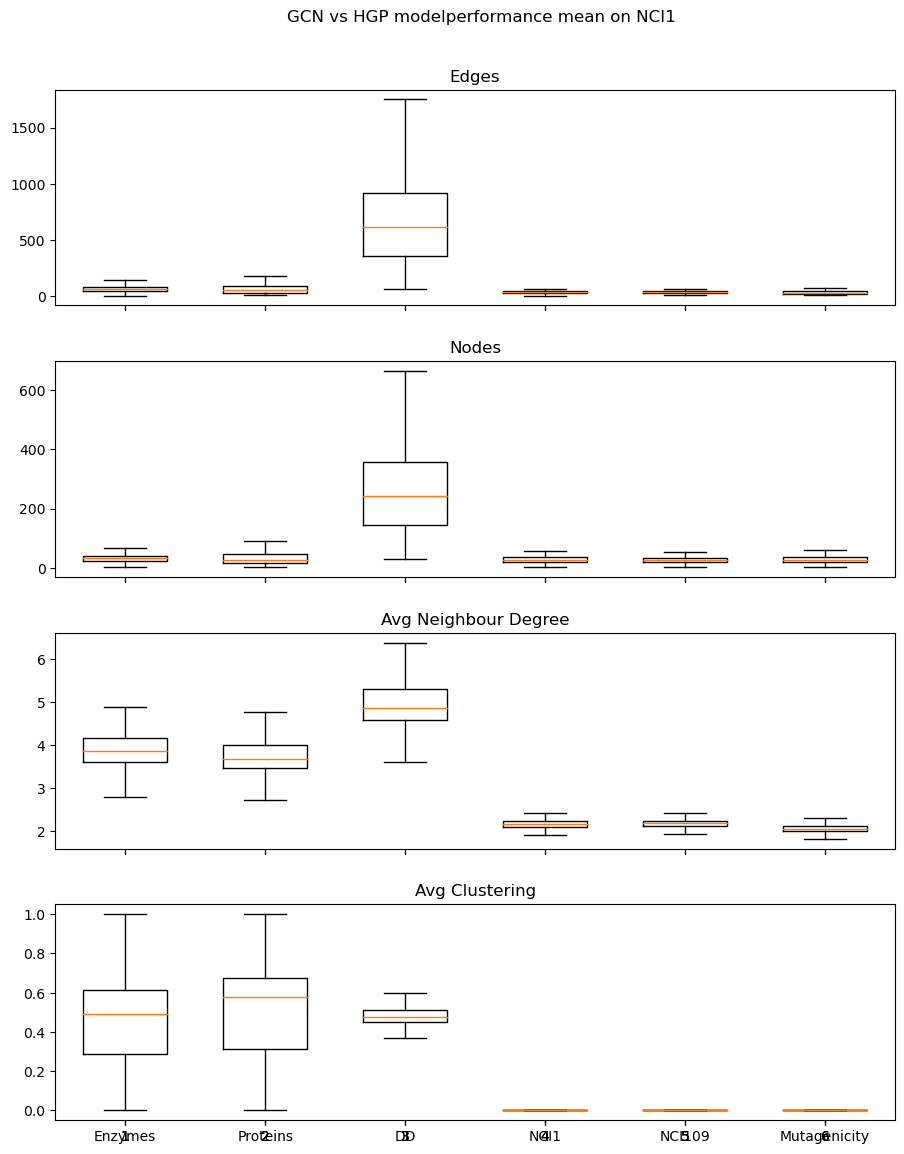

In [ ]:
names = ["Enzymes", "Proteins", "DD", "NCI1", "NCI109", "Mutagenicity"]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
fig.suptitle('GCN vs HGP modelperformance mean on NCI1')
# make fig bigger
fig.set_size_inches(10, 12)
xtickNames = plt.setp(ax1, xticklabels=names)
plt.setp(xtickNames, rotation=45, fontsize=8)
fig.tight_layout(pad=3.0)
# make a boxplot in ax1 with all the data
ax1.boxplot(np_enzymes[:,0], positions=[1], widths=0.6, showfliers=False)
ax1.boxplot(np_proteins[:,0], positions=[2], widths=0.6, showfliers=False)
ax1.boxplot(np_dd[:,0], positions=[3], widths=0.6, showfliers=False)
ax1.boxplot(np_nci1[:,0], positions=[4], widths=0.6, showfliers=False)
ax1.boxplot(np_nci109[:,0], positions=[5], widths=0.6, showfliers=False)
ax1.boxplot(np_muta[:,0], positions=[6], widths=0.6, showfliers=False)
ax1.set_title('Edges')

ax2.boxplot(np_enzymes[:,1], positions=[1], widths=0.6, showfliers=False)
ax2.boxplot(np_proteins[:,1], positions=[2], widths=0.6,showfliers=False)
ax2.boxplot(np_dd[:,1], positions=[3], widths=0.6, showfliers=False)
ax2.boxplot(np_nci1[:,1], positions=[4], widths=0.6, showfliers=False)
ax2.boxplot(np_nci109[:,1], positions=[5], widths=0.6, showfliers=False)
ax2.boxplot(np_muta[:,1], positions=[6], widths=0.6, showfliers=False)
ax2.set_title('Nodes')

ax3.boxplot(np_enzymes[:,2], positions=[1], widths=0.6,showfliers=False)
ax3.boxplot(np_proteins[:,2], positions=[2], widths=0.6,showfliers=False)
ax3.boxplot(np_dd[:,2], positions=[3], widths=0.6,showfliers=False)
ax3.boxplot(np_nci1[:,2], positions=[4], widths=0.6,showfliers=False)
ax3.boxplot(np_nci109[:,2], positions=[5], widths=0.6,showfliers=False)
ax3.boxplot(np_muta[:,2], positions=[6], widths=0.6,showfliers=False)
ax3.set_title('Avg Degree')

ax4.boxplot(np_enzymes[:,3], positions=[1], widths=0.6,showfliers=False)
ax4.boxplot(np_proteins[:,3], positions=[2], widths=0.6,showfliers=False)
ax4.boxplot(np_dd[:,3], positions=[3], widths=0.6,showfliers=False)
ax4.boxplot(np_nci1[:,3], positions=[4], widths=0.6,showfliers=False)
ax4.boxplot(np_nci109[:,3], positions=[5], widths=0.6,showfliers=False)
ax4.boxplot(np_muta[:,3], positions=[6], widths=0.6,showfliers=False)
ax4.set_title('Avg Neighbor Degree')

ax5.boxplot(np_enzymes[:,4], positions=[1], widths=0.6,showfliers=False)
ax5.boxplot(np_proteins[:,4], positions=[2], widths=0.6,showfliers=False)
ax5.boxplot(np_dd[:,4], positions=[3], widths=0.6,showfliers=False)
ax5.boxplot(np_nci1[:,4], positions=[4], widths=0.6,showfliers=False)
ax5.boxplot(np_nci109[:,4], positions=[5], widths=0.6,showfliers=False)
ax5.boxplot(np_muta[:,4], positions=[6], widths=0.6,showfliers=False)
ax5.set_title('Correlation')

for ax in fig.get_axes():
    ax.label_outer()

Let's observe a single graph from the data

IN THE FIRST LINE YOU CAN SELECT A SPECIFIC GRAPH (e.g. 10th) OR LEAVE THE DEFAULT VALUE

In [9]:
graph_to_work_with = 400


data = dataset[graph_to_work_with]
print(data)



# create graph for igraph
edges_df = pd.DataFrame(data.edge_index.T.numpy())
g = Graph.DataFrame(edges_df, directed=data.is_directed())

info_dataset()

print()
print("Graph is directed: ", data.is_directed())
print("Number of cliques: ", g.clique_number())

info_degree()

print()
print("Number of nodes: ", g.vcount())
print("Number of edges: ", g.ecount())


# plot graph
visual_style = {}
layout = g.layout(layout='drl')
# make the nodes with max. degrees blue (aka hubs)
g.vs["color"] = ["blue" if node.degree()==10 else "green" for node in g.vs]
#visual_style["edge_curved"] = False
ig.plot(g, bbox=(300, 300), margin=20, vertex_size=10, **visual_style)

NameError: name 'dataset' is not defined

Show degree distribution

In [8]:
x = [x for x in range(g.maxdegree()+1)]
degree_counts = [0 for x in range(g.maxdegree()+1)]

for i in degrees:
    degree_counts[i] += 1

print(len(x))
print(len(degree_counts))

plt.figure()
plt.plot(x, degree_counts)
plt.ylabel('Number of vertices with degree k')
plt.xlabel('Degree k')
plt.title('Degree Distribution of Vertices')

plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.show()
plt.draw()

NameError: name 'degrees' is not defined

Methods needed for degree correlation

In [7]:
def knn(vertex):
  # print the average degree of neighbors of the vertex
  neighb = g.neighbors(vertex)
  degrees = [g.degree(n) for n in neighb]
  return np.average(degrees)

def print_deg_correlation(g):
  deg_corr = round(g.assortativity_degree(directed=data.is_directed()),2)
  
  if deg_corr > 0:
    print(f"Assortative graph with Degree Correlation Coefficient = {deg_corr}")

  if deg_corr == 0:
    print(f"Neutral graph with Degree Correlation Coefficient = {deg_corr}")

  if deg_corr < 0:
    print(f"Disasortative graph with Degree Correlation Coefficient = {deg_corr}")

def info_degree_correlation(g):
  deg = [x.degree() for x in g.vs]
  avg_deg = [knn(x) for x in g.vs]

  y_mean = [np.mean(avg_deg)]*len(deg)

  plt.figure()
  plt.scatter(deg, avg_deg, label='Data', marker='o')
  plt.plot(deg, y_mean, label='Mean', linestyle='--')
  plt.title("Degree Correlation")
  plt.xlabel("Degree")
  plt.ylabel("Average neighbors degree (knn)")
  plt.legend()
  plt.show()

  print_deg_correlation(g)

In [8]:
info_degree_correlation(g)

NameError: name 'g' is not defined

In [ ]:
# take graphs and save in analysis folder with pickle
# Code autogenerated by Github Copilot to showcase functionality
import pickle
from networkx import Graph

def save_graphs(dataset, name):
    graphs = []
    for i in range(len(dataset)):
        data = dataset[i]
        edges_df = pd.DataFrame(data.edge_index.T.numpy())
        g = Graph(edges_df, directed=data.is_directed())
        graphs.append(g)
    with open(f"/content/drive/MyDrive/AML_CNA/analysis/{name}.pkl", "wb") as f:
        pickle.dump(graphs, f)


def load_graphs(name):
    with open(f"/content/drive/MyDrive/AML_CNA/analysis/{name}.pkl", "rb") as f:
        graphs = pickle.load(f)
    return graphs

save_graphs(dataset_Enzymes, "Enzymes")
save_graphs(dataset_Proteins, "Proteins")
save_graphs(dataset_DD, "DD")
save_graphs(dataset_NCI1, "NCI1")
save_graphs(dataset_NCI109, "NCI109")
save_graphs(dataset_Mutagenicity, "Mutagenicity")
